In [14]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
starbucks = pd.read_csv("directory.csv") # 读取数据文件
starbucks.head() # 查看文件头，是否能正确显示


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [15]:
starbucks.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [16]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()


Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                 0
State/Province       0
Country              0
Postcode          1507
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [17]:
print("星巴克旗下品牌有：\n",starbucks.Brand.value_counts())
coffee = starbucks[starbucks.Brand=='Starbucks']

print("-------------------------")
print(coffee.shape)
print(f'There\'re {coffee.shape[0]} Starbucks cafeteria worldwide!')


星巴克旗下品牌有：
 Brand
Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: count, dtype: int64
-------------------------
(25249, 13)
There're 25249 Starbucks cafeteria worldwide!


In [18]:
df = starbucks.groupby(["Country"]).size()
print("全世界一共多少个国家或地区开设了星巴克门店:",df.size)
df1 = df.sort_values( ascending=True)
print("排名前10的国家或地区：\n",df1.tail(10))


全世界一共多少个国家或地区开设了星巴克门店: 73
排名前10的国家或地区：
 Country
PH      298
TR      326
TW      394
MX      579
GB      901
KR      993
JP     1237
CA     1468
CN     2734
US    13608
dtype: int64


In [19]:
print(coffee.Country.nunique())

73


In [20]:
print(coffee.City.nunique())

5401


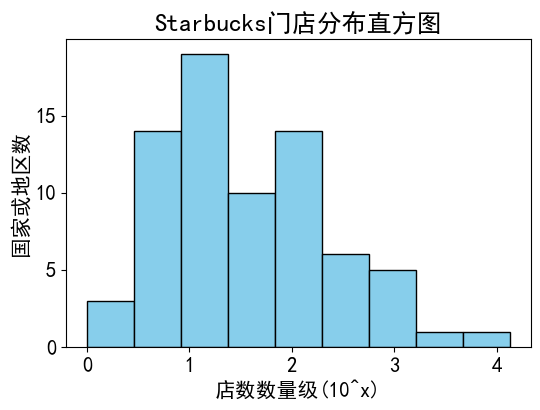

Country
US    13311
CN     2734
CA     1415
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: count, dtype: int64


Text(0.5, 0, 'Countries/Area')

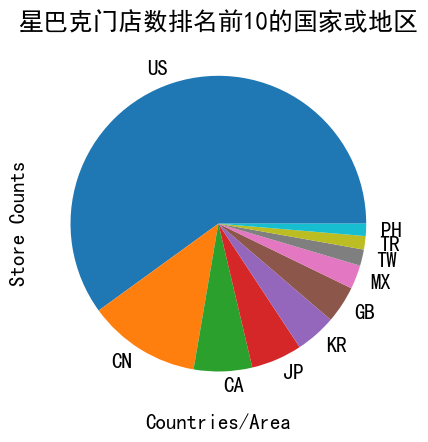

In [21]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'SimHei'
plt.figure(1,figsize=(6,4))
count_starbucks =coffee.Country.value_counts()
plt.hist(np.log10(count_starbucks.values), bins="auto", color='skyblue', edgecolor='black')
plt.xlabel('店数数量级(10^x)')
plt.ylabel('国家或地区数')
plt.title('Starbucks门店分布直方图')
plt.show()

count_top10 = count_starbucks.head(10)
print(count_top10)
count_top10.plot(kind='pie',rot=0)
plt.title('星巴克门店数排名前10的国家或地区')
plt.ylabel('Store Counts')
plt.xlabel('Countries/Area')


全世界星巴克门店数量排名前10的城市：
 City
上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Seattle        156
Las Vegas      156
Name: count, dtype: int64


Text(0.5, 0, 'Cities')

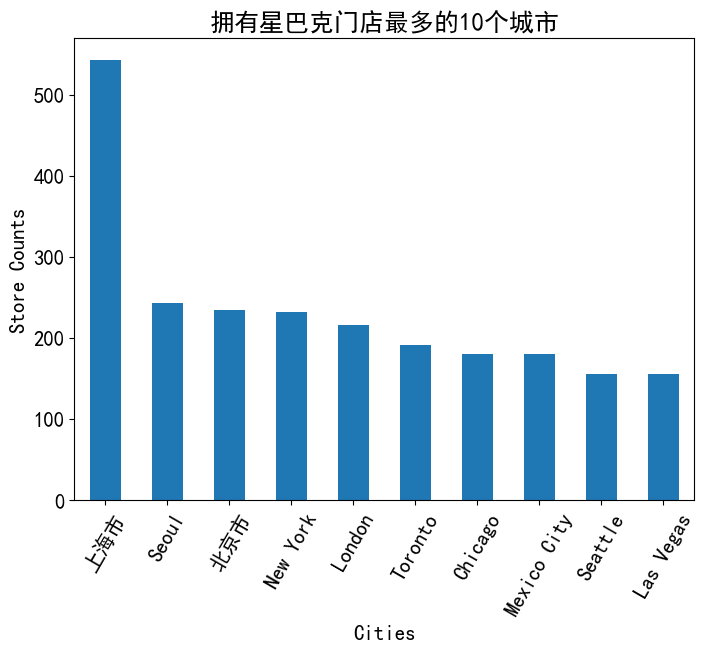

In [22]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()
count_starbucks_city = star.City.value_counts()
print("全世界星巴克门店数量排名前10的城市：\n",count_starbucks_city.head(10))
plt.figure(1,figsize=(8,6))
count_starbucks_city =star.City.value_counts()
city_top10 = count_starbucks_city.head(10)
city_top10.plot(kind='bar',rot=60)
plt.title('拥有星巴克门店最多的10个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')


全世界星巴克门店数量排名后5的城市：
 City
Tepebasi         1
Isparta          1
Mersin (Icel)    1
Mersin Icel      1
Midrand          1
Name: count, dtype: int64


Text(0.5, 0, 'Cities')

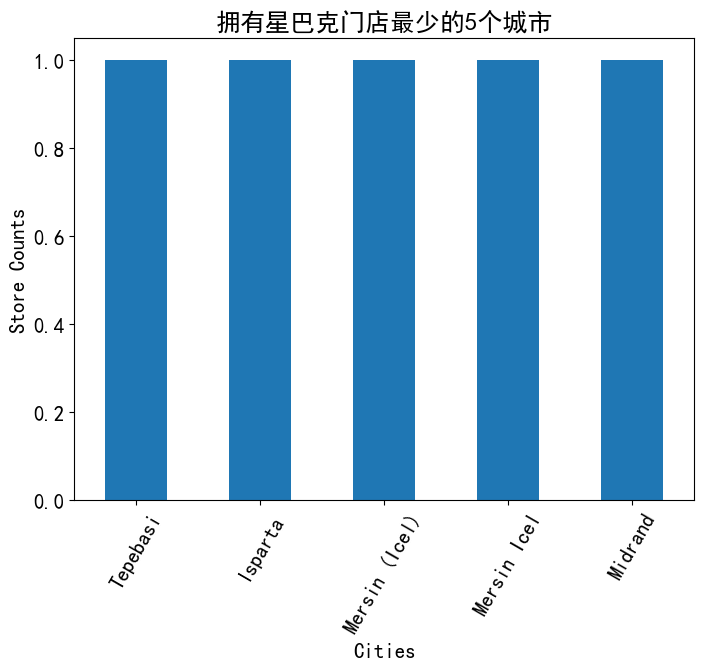

In [23]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()
count_starbucks_city = star.City.value_counts()
print("全世界星巴克门店数量排名后5的城市：\n",count_starbucks_city.tail(5))
plt.figure(1,figsize=(8,6))
count_starbucks_city =star.City.value_counts()
city_top10 = count_starbucks_city.tail(5)
city_top10.plot(kind='bar',rot=60)
plt.title('拥有星巴克门店最少的5个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')


In [24]:
#选择中国的数据
df = star[star["Country"]=="CN"]
df1 = df.copy()
df1 = df1.groupby(["City"]).size().sort_values( ascending=False)
df1.head(10)


City
上海市          542
北京市          234
杭州市          117
深圳市          113
广州市          106
Hong Kong    104
成都市           98
苏州市           90
南京市           73
武汉市           67
dtype: int64

In [25]:
#选择中国的数据
df = star[star["Country"]=="US"]
df1 = df.copy()

df1 = df1.groupby(["City"]).size().sort_values( ascending=False)
df1.tail(3)


City
Lake Park       1
Lake Orion      1
westmoreland    1
dtype: int64

<Axes: title={'center': '星巴克门店所有权类型'}, ylabel='count'>

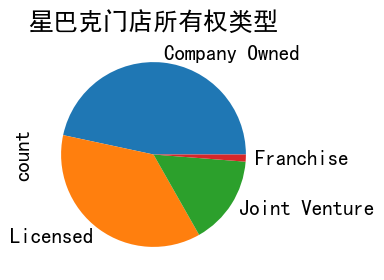

In [26]:
plt.figure(1,figsize=(4,3))
ownership = star['Ownership Type'].value_counts()
plt.title('星巴克门店所有权类型')
ownership.plot(kind='pie')
